In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Semilla para reproducibilidad
np.random.seed(42)

n_transacciones = 2000

# Transacciones normales (distribución normal)
transacciones_normales = np.random.normal(
    loc=150,      # media
    scale=50,     # desviación estándar
    size=n_transacciones // 2
)

# Transacciones de lujo (distribución log-normal)
transacciones_lujo = np.random.lognormal(
    mean=5.5,
    sigma=0.8,
    size=n_transacciones // 2
)

# Combinar ambos tipos de transacciones
montos = np.concatenate([transacciones_normales, transacciones_lujo])

# Crear DataFrame
df = pd.DataFrame({
    'id_transaccion': range(1, len(montos) + 1),
    'monto': np.round(montos, 2),
    'tipo_cliente': np.random.choice(['Regular', 'Premium', 'VIP'], len(montos)),
    'categoria': np.random.choice(
        ['Alimentos', 'Electrónicos', 'Ropa', 'Servicios'],
        len(montos)
    )
})

print(f"Dataset creado: {len(df)} transacciones")
print(f"Rango de montos: ${df['monto'].min():.2f} - ${df['monto'].max():.2f}")

df.head()

Dataset creado: 2000 transacciones
Rango de montos: $-12.06 - $3147.88


,id_transaccion,monto,tipo_cliente,categoria
0,1,174.84,Premium,Electrónicos
1,2,143.09,VIP,Alimentos
2,3,182.38,Premium,Alimentos
3,4,226.15,VIP,Servicios
4,5,138.29,VIP,Ropa


In [2]:
# Estadísticos descriptivos
print("ANÁLISIS DESCRIPTIVO")
print("=" * 25)
print(df['monto'].describe())

# Medidas de forma
print("\nMEDIDAS DE FORMA")
print("=" * 20)

skewness = df['monto'].skew()
kurtosis = df['monto'].kurtosis()

print(f"Asimetría (Skewness): {skewness:.3f}")
if skewness > 0:
    print("  Interpretación: Sesgo positivo (cola derecha más larga)")
elif skewness < 0:
    print("  Interpretación: Sesgo negativo (cola izquierda más larga)")
else:
    print("  Interpretación: Distribución simétrica")

print(f"\nCurtosis: {kurtosis:.3f}")
if kurtosis > 0:
    print("  Interpretación: Leptocúrtica (colas pesadas, más outliers)")
elif kurtosis < 0:
    print("  Interpretación: Platicúrtica (colas ligeras)")
else:
    print("  Interpretación: Mesocúrtica (similar a normal)")

# Comparación media vs mediana
media = df['monto'].mean()
mediana = df['monto'].median()

print("\nCOMPARACIÓN MEDIA VS MEDIANA")
print("=" * 30)
print(f"Media:    ${media:.2f}")
print(f"Mediana:  ${mediana:.2f}")
print(f"Diferencia: ${media - mediana:.2f}")
print(f"Diferencia relativa: {((media - mediana) / mediana * 100):.1f}%")

ANÁLISIS DESCRIPTIVO
count    2000.000000
mean      252.769495
std       252.807549
min       -12.060000
25%       126.240000
50%       175.125000
75%       262.682500
max      3147.880000
Name: monto, dtype: float64

MEDIDAS DE FORMA
Asimetría (Skewness): 4.014
  Interpretación: Sesgo positivo (cola derecha más larga)

Curtosis: 25.445
  Interpretación: Leptocúrtica (colas pesadas, más outliers)

COMPARACIÓN MEDIA VS MEDIANA
Media:    $252.77
Mediana:  $175.12
Diferencia: $77.64
Diferencia relativa: 44.3%


In [3]:
from scipy import stats

print("DETECCIÓN DE OUTLIERS")
print("=" * 30)

# Método IQR
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

limite_inf_iqr = Q1 - 1.5 * IQR
limite_sup_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['monto'] < limite_inf_iqr) | (df['monto'] > limite_sup_iqr)]

print("\nMÉTODO IQR")
print("-" * 20)
print(f"Límite inferior: ${limite_inf_iqr:.2f}")
print(f"Límite superior: ${limite_sup_iqr:.2f}")
print(f"Cantidad de outliers: {len(outliers_iqr)}")

# Método Z-score
z_scores = stats.zscore(df['monto'])
outliers_z = df[abs(z_scores) > 3]

print("\nMÉTODO Z-SCORE (|z| > 3)")
print("-" * 30)
print(f"Cantidad de outliers: {len(outliers_z)}")

# Comparación
outliers_comunes = set(outliers_iqr.index) & set(outliers_z.index)

print("\nCOMPARACIÓN DE MÉTODOS")
print("-" * 30)
print(f"Outliers detectados por ambos métodos: {len(outliers_comunes)}")
print(f"Solo IQR: {len(outliers_iqr) - len(outliers_comunes)}")
print(f"Solo Z-score: {len(outliers_z) - len(outliers_comunes)}")

DETECCIÓN DE OUTLIERS

MÉTODO IQR
--------------------
Límite inferior: $-78.42
Límite superior: $467.35
Cantidad de outliers: 229

MÉTODO Z-SCORE (|z| > 3)
------------------------------
Cantidad de outliers: 41

COMPARACIÓN DE MÉTODOS
------------------------------
Outliers detectados por ambos métodos: 41
Solo IQR: 188
Solo Z-score: 0


In [4]:
# Método IQR
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

limite_inf_iqr = Q1 - 1.5 * IQR
limite_sup_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['monto'] < limite_inf_iqr) | (df['monto'] > limite_sup_iqr)]

# Método Z-Score
z_scores = stats.zscore(df['monto'])
outliers_zscore = df[abs(z_scores) > 3]

print("\nDETECCIÓN DE OUTLIERS")
print("=" * 25)
print(f"Método IQR: {len(outliers_iqr)} outliers")
print(f"  Límite inferior: ${limite_inf_iqr:.2f}")
print(f"  Límite superior: ${limite_sup_iqr:.2f}")

print(f"\nMétodo Z-Score (|z| > 3): {len(outliers_zscore)} outliers")

# Comparar métodos
outliers_comunes = set(outliers_iqr.index) & set(outliers_zscore.index)
print(f"Outliers detectados por ambos métodos: {len(outliers_comunes)}")


DETECCIÓN DE OUTLIERS
Método IQR: 229 outliers
  Límite inferior: $-78.42
  Límite superior: $467.35

Método Z-Score (|z| > 3): 41 outliers
Outliers detectados por ambos métodos: 41


In [5]:
print("ANÁLISIS POR CATEGORÍA")
print("=" * 30)

categoria_stats = df.groupby('categoria').agg({
    'monto': ['count', 'mean', 'median', 'std', 'skew', 'kurtosis']
}).round(2)

print(categoria_stats)

print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_stats = df.groupby('tipo_cliente').agg({
    'monto': ['count', 'mean', 'median', 'std', 'skew']
}).round(2)

print(cliente_stats)

ANÁLISIS POR CATEGORÍA


AttributeError: 'SeriesGroupBy' object has no attribute 'kurtosis'

In [6]:
print("\nANÁLISIS POR CATEGORÍA")
print("=" * 25)

categoria_stats = df.groupby('categoria').agg({
    'monto': ['count', 'mean', 'median', 'std', 'skew', 'kurtosis']
}).round(3)

print(categoria_stats)

# Análisis por tipo de cliente
print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_stats = df.groupby('tipo_cliente').agg({
    'monto': ['count', 'mean', 'median', 'skew']
}).round(2)

print(cliente_stats)


ANÁLISIS POR CATEGORÍA


AttributeError: 'SeriesGroupBy' object has no attribute 'kurtosis'

In [7]:
print("ANÁLISIS POR CATEGORÍA")
print("=" * 30)

categoria_stats = df.groupby('categoria').agg(
    count=('monto', 'count'),
    mean=('monto', 'mean'),
    median=('monto', 'median'),
    std=('monto', 'std'),
    skew=('monto', 'skew'),
    kurtosis=('monto', lambda x: x.kurtosis())
).round(2)

print(categoria_stats)

print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)

cliente_stats = df.groupby('tipo_cliente').agg(
    count=('monto', 'count'),
    mean=('monto', 'mean'),
    median=('monto', 'median'),
    std=('monto', 'std'),
    skew=('monto', 'skew')
).round(2)

print(cliente_stats)

ANÁLISIS POR CATEGORÍA
              count    mean  median     std  skew  kurtosis
categoria                                                  
Alimentos       482  262.61  182.60  243.44  2.91     10.69
Electrónicos    514  247.38  173.04  250.74  4.69     35.57
Ropa            528  260.26  174.83  292.61  4.36     27.04
Servicios       476  240.32  172.46  213.82  2.99     12.84

ANÁLISIS POR TIPO DE CLIENTE
              count    mean  median     std  skew
tipo_cliente                                     
Premium         650  251.22  173.57  257.51  3.39
Regular         676  247.64  175.92  242.64  4.68
VIP             674  259.41  177.86  258.40  4.06


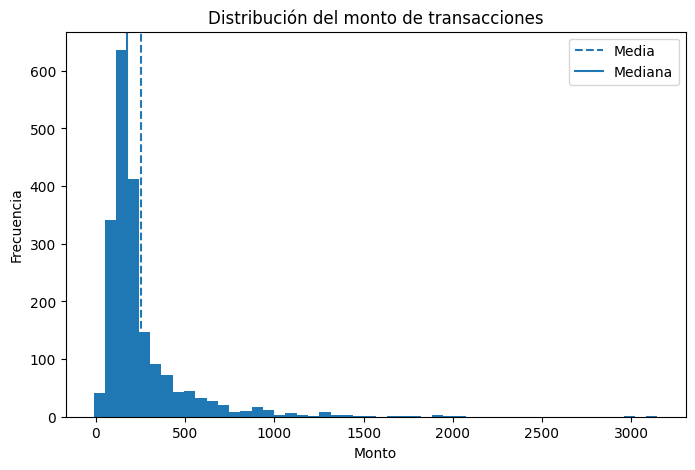

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['monto'], bins=50)
plt.axvline(df['monto'].mean(), linestyle='--', label='Media')
plt.axvline(df['monto'].median(), linestyle='-', label='Mediana')

plt.title('Distribución del monto de transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.legend()

plt.savefig('distribucion_montos.png', dpi=100, bbox_inches='tight')
plt.show()

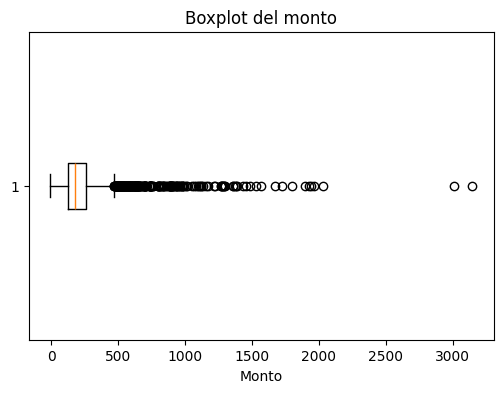

In [11]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['monto'], vert=False)
plt.title('Boxplot del monto')
plt.xlabel('Monto')

plt.savefig('boxplot_montos.png', dpi=100, bbox_inches='tight')
plt.show()

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

# ===============================
# TABLAS BASE
# ===============================

estadisticos = df['monto'].describe().to_frame(name='valor')

medidas_forma = pd.DataFrame({
    'medida': ['media', 'mediana', 'skewness', 'kurtosis'],
    'valor': [
        df['monto'].mean(),
        df['monto'].median(),
        df['monto'].skew(),
        df['monto'].kurtosis()
    ]
})

# ===============================
# OUTLIERS
# ===============================

Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_iqr = df[(df['monto'] < lim_inf) | (df['monto'] > lim_sup)]

z_scores = stats.zscore(df['monto'])
outliers_zscore = df[abs(z_scores) > 3]

# ===============================
# ANÁLISIS AGRUPADO
# ===============================

analisis_categoria = df.groupby('categoria').agg(
    count=('monto', 'count'),
    mean=('monto', 'mean'),
    median=('monto', 'median'),
    std=('monto', 'std'),
    skew=('monto', 'skew'),
    kurtosis=('monto', lambda x: x.kurtosis())
).round(2)

analisis_tipo_cliente = df.groupby('tipo_cliente').agg(
    count=('monto', 'count'),
    mean=('monto', 'mean'),
    median=('monto', 'median'),
    std=('monto', 'std'),
    skew=('monto', 'skew')
).round(2)

# ===============================
# EXPORTAR A EXCEL (EVIDENCIA)
# ===============================

with pd.ExcelWriter('Evidencia_Dia3_Analisis_Distribuciones.xlsx') as writer:
    df.to_excel(writer, sheet_name='dataset_transacciones', index=False)
    estadisticos.to_excel(writer, sheet_name='estadisticos_descriptivos')
    medidas_forma.to_excel(writer, sheet_name='medidas_forma', index=False)
    outliers_iqr.to_excel(writer, sheet_name='outliers_iqr', index=False)
    outliers_zscore.to_excel(writer, sheet_name='outliers_zscore', index=False)
    analisis_categoria.to_excel(writer, sheet_name='analisis_categoria')
    analisis_tipo_cliente.to_excel(writer, sheet_name='analisis_tipo_cliente')

print("✅ Excel de evidencia generado correctamente")

✅ Excel de evidencia generado correctamente


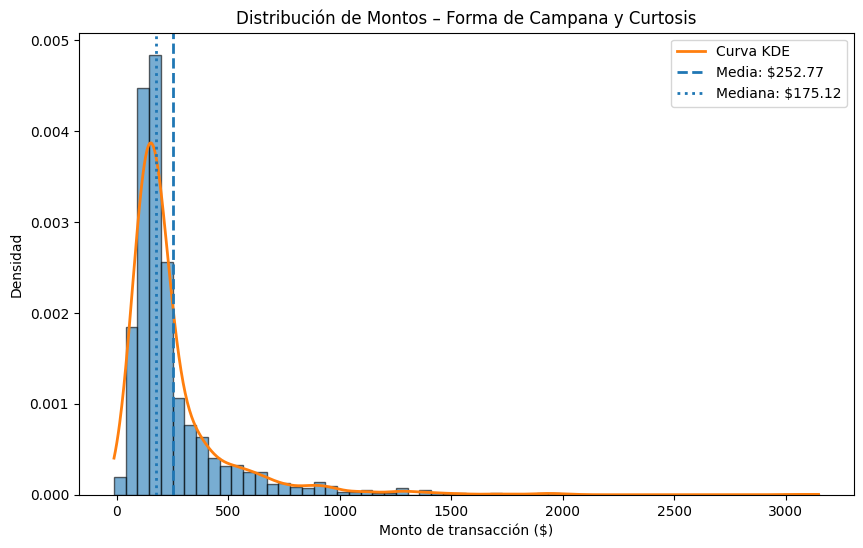

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ===============================
# HISTOGRAMA + KDE (CURTOSIS)
# ===============================

plt.figure(figsize=(10, 6))

# Histograma normalizado
plt.hist(df['monto'], bins=60, density=True, alpha=0.6, edgecolor='black')

# Curva KDE
kde = gaussian_kde(df['monto'])
x_vals = np.linspace(df['monto'].min(), df['monto'].max(), 1000)
plt.plot(x_vals, kde(x_vals), linewidth=2, label='Curva KDE')

# Media y mediana
plt.axvline(df['monto'].mean(), linestyle='--', linewidth=2,
            label=f"Media: ${df['monto'].mean():.2f}")
plt.axvline(df['monto'].median(), linestyle=':', linewidth=2,
            label=f"Mediana: ${df['monto'].median():.2f}")

# Etiquetas
plt.title('Distribución de Montos – Forma de Campana y Curtosis')
plt.xlabel('Monto de transacción ($)')
plt.ylabel('Densidad')
plt.legend()

# Guardar evidencia
plt.savefig('distribucion_curtosis_montos.png', dpi=120, bbox_inches='tight')
plt.show()